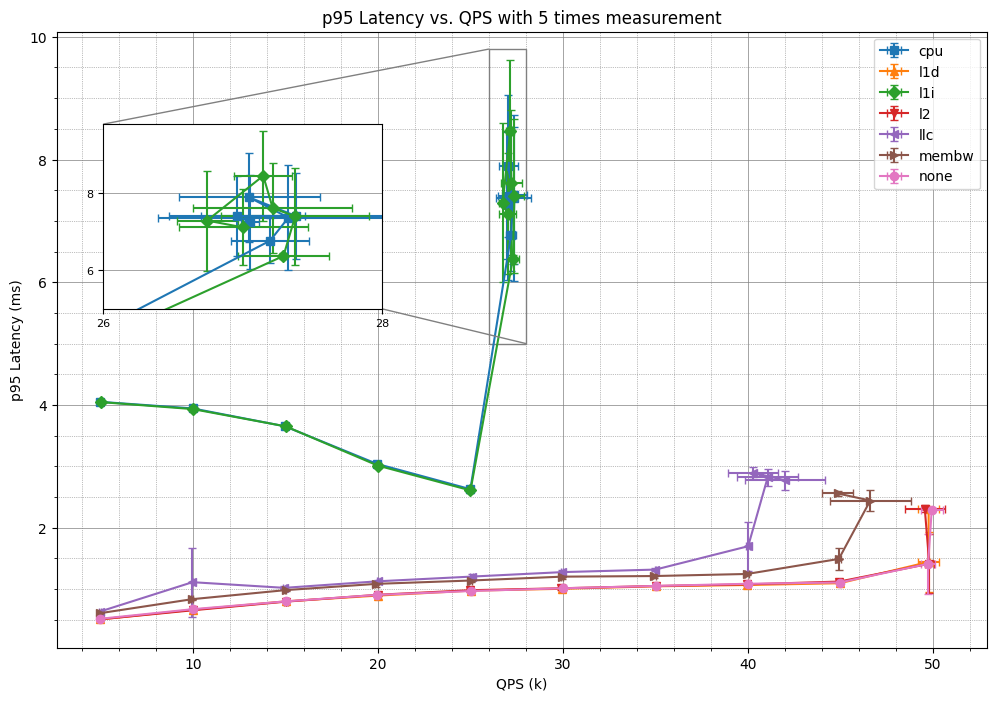

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import os

target_folder = './processedcsv' 
all_files = glob.glob(os.path.join(target_folder, '*.csv'))

# 初始化一个空的DataFrame来存储所有数据
all_data = pd.DataFrame()

# 读取每个文件并附加到all_data DataFrame
for file in all_files:
    df = pd.read_csv(file)
    # 从文件名解析测量类型，确保只取最后一部分然后去掉前后缀
    measurement_type = os.path.basename(file).split('-')[0]
    df['measurement'] = measurement_type
    all_data = pd.concat([all_data, df], ignore_index=True)

# 计算每种测量和target设置下的p95和QPS的平均值和标准偏差
summary = all_data.groupby(['measurement', 'target']) \
    .agg({'p95': ['mean', 'std'], 'QPS': ['mean', 'std']}) \
    .reset_index()

# # 由于列名现在是多级的，我们需要简化它们
summary.columns = ['measurement', 'target', 'p95_mean', 'p95_std', 'QPS_mean', 'QPS_std']

# 将QPS转换为kQPS，将p95转换为ms
summary['QPS_mean'] /= 1000
summary['QPS_std'] /= 1000
summary['p95_mean'] /= 1000
summary['p95_std'] /= 1000


from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# 定义不同测量类型的标记
markers = {
    'none': 'o', 'cpu': 's', 'l1d': '^', 'l1i': 'D',
    'l2': 'v', 'llc': '<', 'membw': '>'
}

target_folder = './processedcsv'
all_files = glob.glob(os.path.join(target_folder, '*.csv'))

# 以下省略数据加载和预处理代码...

# 绘制图表
plt.figure(figsize=(12, 8))
measurements = all_data['measurement'].unique()

# 绘制主图表
for measurement in measurements:
    measurement_data = summary[summary['measurement'] == measurement]
    plt.errorbar(measurement_data['QPS_mean'], measurement_data['p95_mean'],
                 xerr=measurement_data['QPS_std'], yerr=measurement_data['p95_std'],
                 fmt='-', marker=markers[measurement], capsize=3, label=measurement)

# 主图表的网格和坐标轴
plt.xlabel('QPS (k)')
plt.ylabel('p95 Latency (ms)')
plt.title('p95 Latency vs. QPS with 5 times measurement')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()

# 使用局部放大视图
zoom_area = [26, 28.3]  # kQPS
ax = plt.gca()
# 调整inset_axes的参数放置内部轴对象
axins = ax.inset_axes([0.05, 0.55, 0.3, 0.3])  # 将内部轴对象大小减小并放置在左上角

for measurement in measurements:
    measurement_data = summary[summary['measurement'] == measurement]
    axins.errorbar(measurement_data['QPS_mean'], measurement_data['p95_mean'],
                   xerr=measurement_data['QPS_std'], yerr=measurement_data['p95_std'],
                   fmt='-', marker=markers[measurement], capsize=3)

# 设置放大视图的范围和网格
axins.set_xlim(zoom_area[0], zoom_area[1])
axins.set_ylim(5, 9.8)
axins.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
axins.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
axins.xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))  # 限制x轴的刻度数量
axins.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))  # 限制y轴的刻度数量
axins.tick_params(labelsize=8)  # 减小放大视图中的刻度标签大小

# 创建放大区域的标记线（连接放大区域与原图的线）
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# 主图表的图例
plt.legend()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 设置画布大小和分辨率
plt.figure(figsize=(12, 8), dpi=100)

# 为每个测量类型设置不同的标记
markers = {
    'none': 'o', 'cpu': 's', 'l1d': '^', 'l1i': 'D',
    'l2': 'v', 'llc': '<', 'membw': '>'
}

# 定义线条颜色，如果需要的话
colors = {
    'none': 'blue', 'cpu': 'green', 'l1d': 'red', 'l1i': 'cyan',
    'l2': 'magenta', 'llc': 'yellow', 'membw': 'black'
}

# 读取CSV数据，并进行必要的转换
# (代码跳过了数据加载和转换的部分，因为这一步之前已经做过了)

# 假设已经计算好了summary DataFrame
# (此DataFrame包含列'measurement', 'p95_mean', 'p95_std', 'QPS_mean', 'QPS_std')

# 绘制曲线
for measurement in summary['measurement'].unique():
    measurement_data = summary[summary['measurement'] == measurement]
    plt.errorbar(
        measurement_data['QPS_mean'], measurement_data['p95_mean'],
        xerr=measurement_data['QPS_std'], yerr=measurement_data['p95_std'],
        fmt='-', marker=markers[measurement], color=colors[measurement],
        capsize=3, markersize=5, linewidth=1.5, label=measurement
    )

# 设置横坐标为kQPS
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))

# 设置网格线
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 设置坐标轴标题
plt.xlabel('QPS (k)')
plt.ylabel('p95 Latency (ms)')

# 设置图表标题
plt.title('p95 Latency vs. QPS with 5 times Measurements')

# 添加图例
plt.legend(title='Measurement')

# 显示图表
plt.show()


KeyError: 'processedcsv\\cpu'

<Figure size 1200x800 with 0 Axes>